# TPC-C Multi-Tenant with Distributed PVC and Tuned PostgreSQL 17.5

* data is generated and loaded into databases in a distributed filesystem
* experiments do not use preloaded data

* PostgreSQL uses improved args:
```
# --- Connection & Worker Processes ---
- "-c"
- "max_connections=1500"       # https://www.postgresql.org/docs/current/runtime-config-connection.html#GUC-MAX-CONNECTIONS
- "-c"
- "max_worker_processes=128"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-WORKER-PROCESSES
- "-c"
- "max_parallel_workers=64"    # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS
- "-c"
- "max_parallel_workers_per_gather=8"  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS-PER-GATHER
- "-c"
- "max_parallel_maintenance_workers=8" # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-MAINTENANCE-WORKERS

# --- Memory Settings ---
- "-c"
- "shared_buffers=256GB"       # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-SHARED-BUFFERS
- "-c"
- "effective_cache_size=350GB" # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-EFFECTIVE-CACHE-SIZE
- "-c"
- "work_mem=128MB"             # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-WORK-MEM
- "-c"
- "maintenance_work_mem=4GB"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAINTENANCE-WORK-MEM
- "-c"
- "temp_buffers=64MB"          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-TEMP-BUFFERS
- "-c"
- "wal_buffers=16MB"           # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-BUFFERS
- "-c"
- "autovacuum_work_mem=1GB"    # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-WORK-MEM

# --- Autovacuum ---
- "-c"
- "autovacuum=on"                            # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM
- "-c"
- "autovacuum_max_workers=10"               # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-MAX-WORKERS
- "-c"
- "autovacuum_vacuum_cost_limit=1000"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-LIMIT
- "-c"
- "vacuum_cost_limit=1000"                  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-VACUUM-COST-LIMIT
- "-c"
- "autovacuum_naptime=15s"                  # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-NAPTIME
- "-c"
- "autovacuum_vacuum_cost_delay=20ms"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-DELAY

# --- WAL & Checkpoints (Ceph-optimized) ---
- "-c"
- "wal_level=replica"                       # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-LEVEL
- "-c"
- "wal_compression=on"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-COMPRESSION
- "-c"
- "wal_writer_delay=500ms"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-WRITER-DELAY
- "-c"
- "commit_delay=10000"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-COMMIT-DELAY
- "-c"
- "synchronous_commit=off"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-SYNCHRONOUS-COMMIT
- "-c"
- "max_wal_size=2GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MAX-WAL-SIZE
- "-c"
- "min_wal_size=1GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MIN-WAL-SIZE
- "-c"
- "checkpoint_timeout=15min"                # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-TIMEOUT
- "-c"
- "checkpoint_completion_target=0.9"        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-COMPLETION-TARGET

# --- Planner Cost Tweaks (CephFS) ---
- "-c"
- "random_page_cost=4.0"                    # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-RANDOM-PAGE-COST
- "-c"
- "seq_page_cost=1.5"                       # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-SEQ-PAGE-COST
- "-c"
- "cpu_tuple_cost=0.01"                     # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-CPU-TUPLE-COST
- "-c"
- "effective_io_concurrency=2"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-EFFECTIVE-IO-CONCURRENCY
- "-c"
- "default_statistics_target=500"           # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-DEFAULT-STATISTICS-TARGET

# --- Locks and Limits ---
- "-c"
- "max_locks_per_transaction=128"           # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-LOCKS-PER-TRANSACTION
- "-c"
- "max_pred_locks_per_transaction=128"      # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-PRED-LOCKS-PER-TRANSACTION
- "-c"
- "max_stack_depth=7MB"                     # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-STACK-DEPTH
- "-c"
- "max_files_per_process=4000"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-FILES-PER-PROCESS

# --- Miscellaneous ---
- "-c"
- "huge_pages=try"                          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-HUGE-PAGES
```

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from bexhoma import collectors

%matplotlib inline

In [2]:
#path = r"C:\data\benchmarks"
path = r"/home/perdelt/benchmarks"
filename_prefix = "cpu_"

In [3]:
def sanitize_filename(title, max_length=100):
    # Replace non-alphanumeric characters with underscores
    safe = re.sub(r'[^a-zA-Z0-9-_]+', '_', title.strip())
    # Truncate to a safe length
    return safe[:max_length].rstrip('_')
    
def plot_bars(df, y, title, estimator):
    df_plot = df.copy()
    #df_plot = df_plot[df_plot['client']=='1']
    df_plot = df_plot.sort_values(['num_tenants','type'])
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df_plot,
        x='num_tenants',
        y=y,
        hue='type',
        estimator=estimator,
        palette='Set2',
        hue_order=hue_order
    )
    show_height = False
    if show_height:
        for bar in ax.patches:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # X: center of bar
                    height,                             # Y: top of bar
                    f'{height:.1f}',                    # Text (1 decimal place)
                    ha='center', va='bottom', fontsize=8
                )
    # Get tick positions (i.e., the x-axis categories)
    xticks = ax.get_xticks()
    bar_width = ax.patches[0].get_width()
    # Create a mapping from (num_tenants, type) to hatch
    grouped = df_plot.groupby(['num_tenants', 'type']).agg({y: estimator}).reset_index()
    #print(grouped)
    grouped_dict = {(row['num_tenants'], row['type']): hatch_map[row['type']] for _, row in grouped.iterrows()}
    bars = sorted(ax.patches, key=lambda bar: bar.get_x() if bar.get_height() > 0 else 10000)
    for bar, (_, row) in zip(bars, grouped.iterrows()):
        bar.my_id = (row['num_tenants'], row['type'])  # or anything else like an index or uuid
        bar.set_hatch(hatch_map[row['type']]) #grouped_dict[(bar.my_id)])
        bar.set_edgecolor('black')
        bar.set_linewidth(1)
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
    # Final touches
    plt.legend(title='Type')
    ax.legend(fontsize=18)
    #ax.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))  # move outside
    plt.title(f"{title}", fontsize=24)
    #plt.title(f"{title} by Number of Tenants and Type", fontsize=24)
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    # Remove y-axis label
    ax.set_ylabel('')  # or ax.set(ylabel='')
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()



In [4]:
def plot_boxplots(df, y, title):
    plt.figure(figsize=(10, 6))
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    
    # Plot boxplots grouped by num_tenants and colored by type
    ax = sns.boxplot(
        data=df,
        x='num_tenants',
        y=y,#'Goodput (requests/second)',
        hue='type',
        palette='Set2'  # consistent colors per type
    )
    # Add vertical separator lines between groups
    # Get the number of unique num_tenants and type
    num_groups = df['num_tenants'].nunique()
    num_types = df['type'].nunique()
    
    # Extract hue order
    hue_order = ax.get_legend_handles_labels()[1]
    num_hue = len(hue_order)
    
    # Get hue order from seaborn (types)
    _, type_order = ax.get_legend_handles_labels()
    num_types = len(type_order)
    
    #print(len(ax.patches))
    # Set hatches correctly: patches are grouped by x then by hue
    for i, patch in enumerate(ax.patches):
        #print(i)
        type_index = i // (num_groups)
        if type_index >= num_types:
            break
        type_name = type_order[type_index]
        patch.set_hatch(hatch_map.get(type_name, ''))
        #print(hatch_map.get(type_name, ''))
        patch.set_edgecolor('black')
        patch.set_linewidth(1)
    
    # Each num_tenants group has num_types boxes
    for i in range(1, num_groups):
        xpos = i - 0.5 #0.5
        ax.axvline(x=xpos, color='gray', linestyle='--', alpha=0.5)
    
    
    # Update legend with matching hatches
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
        handle.set_edgecolor('black')
        handle.set_linewidth(1)
    
    #title = "Goodput [req/s] Distribution per Tenant"
    plt.title(title, fontsize=24)
    plt.xlabel("Number of Tenants")
    plt.ylabel("")#"Goodput (requests/second)")
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    plt.legend(title="Type")
    ax.legend(fontsize=18)
    plt.tight_layout()
    filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# Results

In [5]:
codes = [
    # container
    '1753175664', #tenants=1
    '1753180817', #tenants=2
    '1753185883', #tenants=3
    '1753191732', #tenants=4
    #'1752464472', #tenants=10

    # database
    '1753174133', #tenants=1
    '1753179015', #tenants=2
    '1753183951', #tenants=3
    '1753189629', #tenants=4
    '1753196023', #tenants=5

    #schema
    '1753172576', #tenants=1
    '1753177220', #tenants=2
    '1753187528', #tenants=4
    '1753193849', #tenants=5
    #'1752537927', #tenants=10

]

codes

['1753175664',
 '1753180817',
 '1753185883',
 '1753191732',
 '1753174133',
 '1753179015',
 '1753183951',
 '1753189629',
 '1753196023',
 '1753172576',
 '1753177220',
 '1753187528',
 '1753193849']

In [6]:
collect = collectors.benchbase(path, codes)

<Axes: >

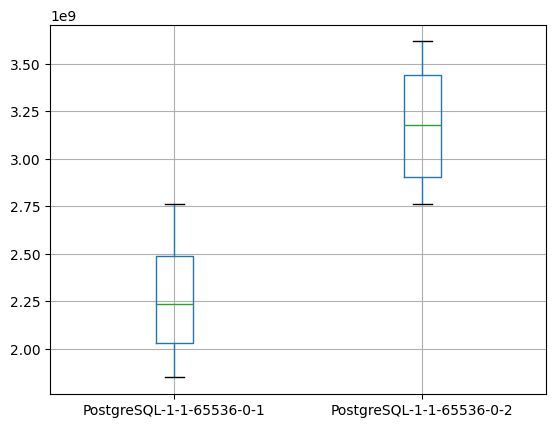

In [7]:
metric = 'pg_stat_database_blks_hit'
#metric = 'pg_stat_database_blks_reads'
#metric = 'pg_stat_activity_count_idle_transaction'
code = codes[0]
df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric)

#df_monitoring.plot(title=metric)
df_monitoring.boxplot()


<Axes: title={'center': 'pg_stat_activity_count_idle_transaction'}>

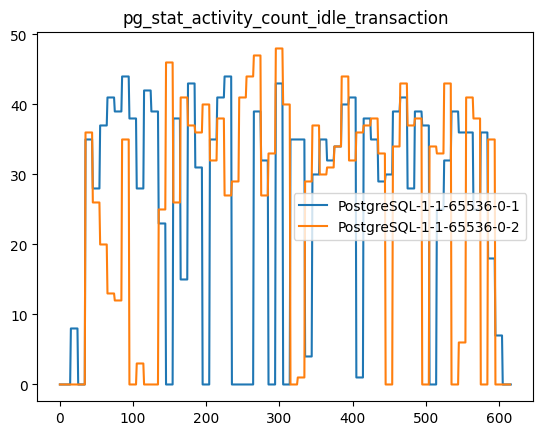

In [8]:
metric = 'pg_stat_database_blks_hit'
metric = 'pg_stat_activity_count_idle_transaction'
code = codes[0]
df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric)

df_monitoring.plot(title=metric)


In [9]:
df_performance = collect.get_monitoring_single_all("stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance#[['Max CPU', 'client', 'type', 'num_tenants']]

,CPU [CPUs],CPU Throttled,Max CPU,Max RAM [Gb],Max RAM Cached [Gb],Locks,Access Exclusive,Access Share,Exclusive,Row Exclusive,...,Heap Hits,Sync Time,Write Time,Cache Hit Ratio [%],Number Autoanalyze,Number Autovacuum,Variance of Core Util [%],client,type,num_tenants
PostgreSQL-1-1-65536-0-1,11725.82,0.0,23.60,14.24,16.00,987.28,NaN,NaN,NaN,NaN,...,500139246.0,0.0,0.0,99.98,116.0,100.0,NaN,1,container,1
PostgreSQL-1-1-65536-0-2,10658.91,0.0,21.08,15.56,16.00,978.75,NaN,NaN,NaN,NaN,...,456932131.0,0.0,0.0,99.98,109.0,96.0,NaN,2,container,1
PostgreSQL-1-1-65536-0-1,10368.35,0.0,19.83,9.94,16.00,993.18,4.51,323.68,15.64,324.63,...,392417227.0,0.0,0.0,100.00,149.0,115.0,154329.55,1,container,2
PostgreSQL-1-1-65536-0-2,9328.39,0.0,17.35,12.16,16.00,986.41,3.91,320.80,17.31,326.90,...,364535217.0,0.0,0.0,100.00,121.0,93.0,107391.55,2,container,2
PostgreSQL-1-1-65536-1-1,10574.34,0.0,19.50,9.78,16.00,1028.51,4.69,333.64,15.15,336.15,...,427560854.0,0.0,0.0,100.00,148.0,112.0,154100.43,1,container,2
PostgreSQL-1-1-65536-1-2,9896.00,0.0,19.27,12.16,16.00,997.25,4.33,324.84,17.80,329.14,...,396674565.0,0.0,0.0,100.00,123.0,100.0,107442.88,2,container,2
PostgreSQL-1-1-65536-0-1,7731.14,0.0,15.30,11.89,16.00,1061.42,7.57,363.77,16.30,327.79,...,268366024.0,0.0,0.0,99.77,113.0,94.0,133403.43,1,container,3
PostgreSQL-1-1-65536-0-2,7965.12,0.0,15.60,13.45,16.00,956.59,4.61,324.52,15.03,315.55,...,336410183.0,0.0,0.0,99.86,110.0,98.0,159489.49,2,container,3
PostgreSQL-1-1-65536-1-1,7868.52,0.0,15.60,12.33,16.00,1004.26,8.08,341.55,14.72,323.53,...,282716112.0,0.0,0.0,99.79,110.0,97.0,133477.95,1,container,3
PostgreSQL-1-1-65536-1-2,8576.24,0.0,20.48,14.07,16.00,899.53,6.90,304.39,14.87,304.28,...,620336654.0,0.0,0.0,99.87,108.0,105.0,159489.49,2,container,3


In [10]:
df_performance = collect.get_monitoring_all("stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance#[['Max CPU', 'client', 'type', 'num_tenants']]

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,CPU Throttled,Locks,Access Exclusive,Access Share,Exclusive,...,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],Variance of Core Util [%],type,num_tenants
0,1,11725.82,14.24,16.00,23.60,0.0,987.28,0.00,0.00,0.00,...,446581.0,5.001392e+08,0.0,0.0,116.0,100.0,99.980000,0.00,container,1
1,2,10658.91,15.56,16.00,21.08,0.0,978.75,0.00,0.00,0.00,...,144068.0,4.569321e+08,0.0,0.0,109.0,96.0,99.980000,0.00,container,1
0,1,20942.69,19.72,32.00,39.33,0.0,2021.69,9.20,657.32,30.79,...,74.0,8.199781e+08,0.0,0.0,297.0,227.0,100.000000,308429.98,container,2
1,2,19224.39,24.32,32.00,36.62,0.0,1983.66,8.24,645.64,35.11,...,58.0,7.612098e+08,0.0,0.0,244.0,193.0,100.000000,214834.43,container,2
0,1,23310.68,35.44,48.00,45.26,0.0,3046.60,20.62,1038.38,45.69,...,1588525.0,8.519603e+08,0.0,0.0,338.0,288.0,99.786667,400135.03,container,3
1,2,24623.32,41.05,48.00,53.58,0.0,2791.79,15.00,938.06,44.39,...,709404.0,1.357277e+09,0.0,0.0,325.0,304.0,99.876667,478573.60,container,3
0,1,29564.34,36.74,63.91,57.98,0.0,4040.49,16.34,1336.12,50.60,...,97.0,1.101593e+09,0.0,0.0,558.0,415.0,100.000000,824232.43,container,4
1,2,27635.42,42.39,64.00,56.57,0.0,4041.11,15.25,1330.30,51.63,...,104.0,1.565014e+09,0.0,0.0,789.0,607.0,99.755000,815041.15,container,4
0,1,9781.57,14.00,16.00,21.45,0.0,980.11,0.00,0.00,0.00,...,640700.0,4.968390e+08,0.0,0.0,112.0,104.0,99.980000,0.00,database,1
1,2,10176.94,15.61,16.00,20.81,0.0,955.86,0.00,0.00,0.00,...,177536.0,4.718775e+08,0.0,0.0,111.0,105.0,99.980000,0.00,database,1


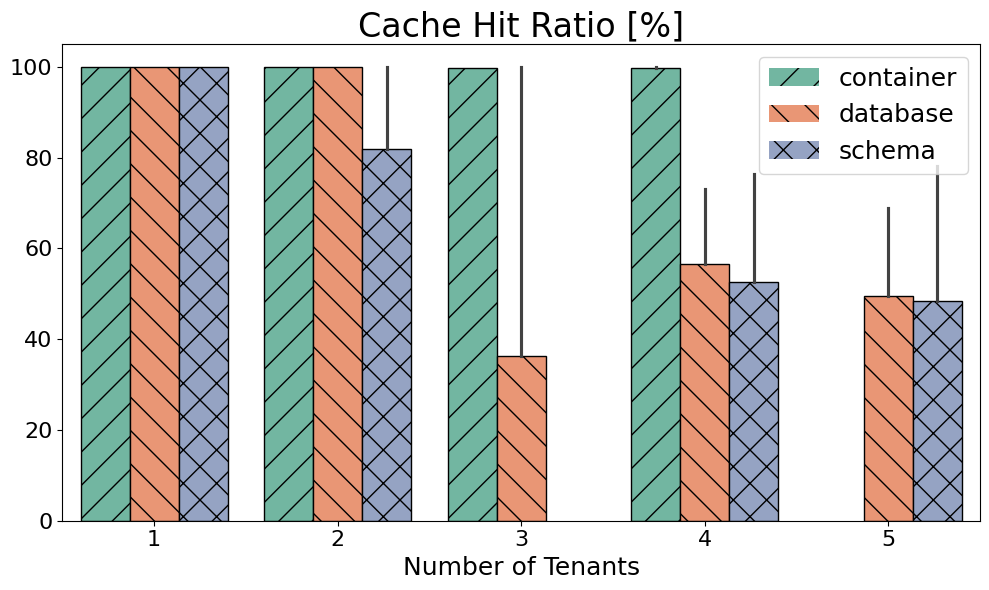

In [11]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance.fillna(0), y='Cache Hit Ratio [%]', title='Cache Hit Ratio [%]', estimator='min')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

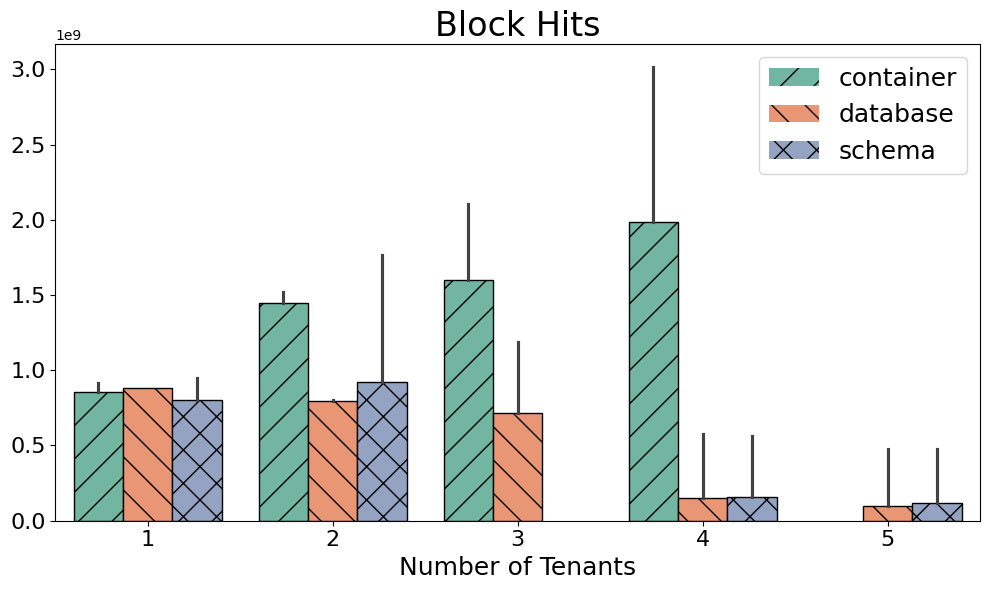

In [12]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Block Hits', title='Block Hits', estimator='min')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

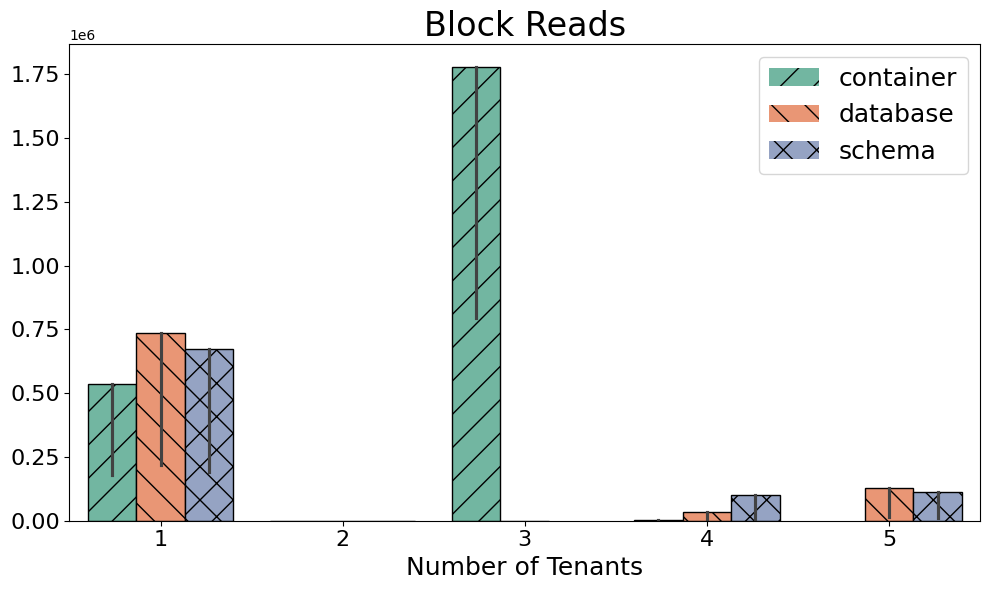

In [13]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Block Reads', title='Block Reads')
plot_bars(df_performance, y='Block Reads', title='Block Reads', estimator='max')

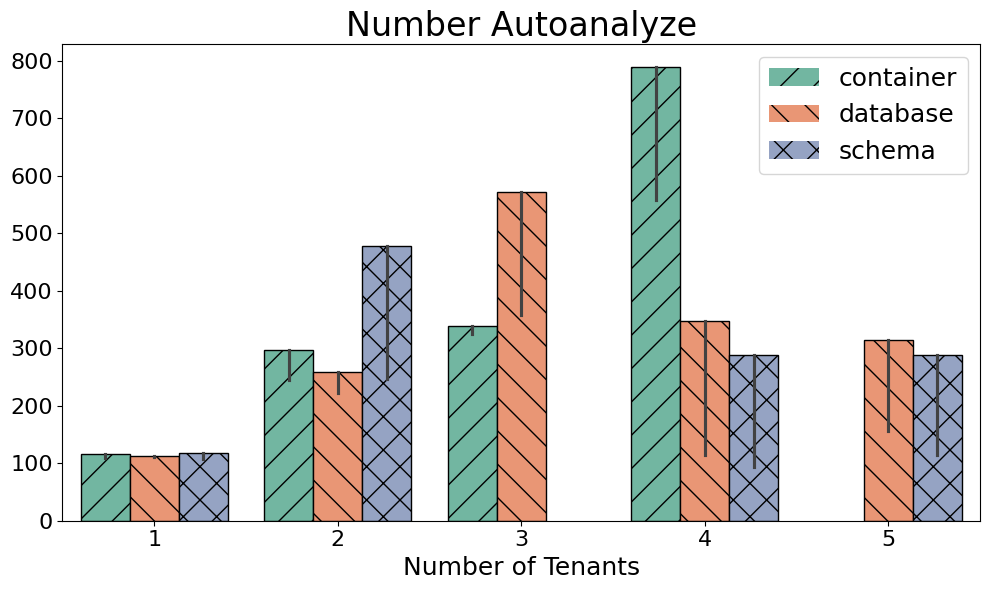

In [14]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Number Autoanalyze', title='Number Autoanalyze', estimator='max')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

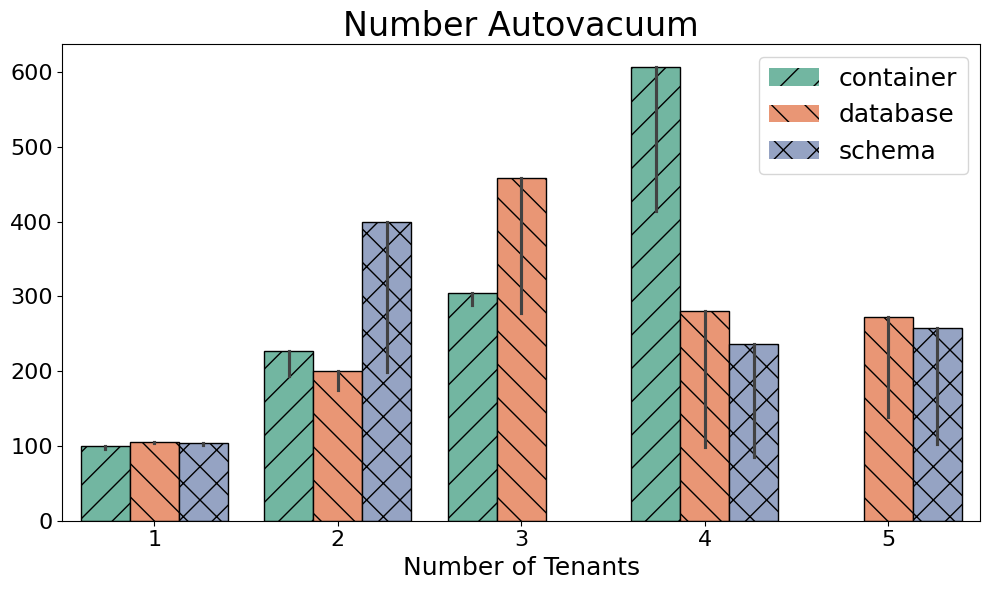

In [15]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_bars(df_performance, y='Number Autovacuum', title='Number Autovacuum', estimator='max')
#plot_boxplots(df, y='Block Hits', title='Block Hits')

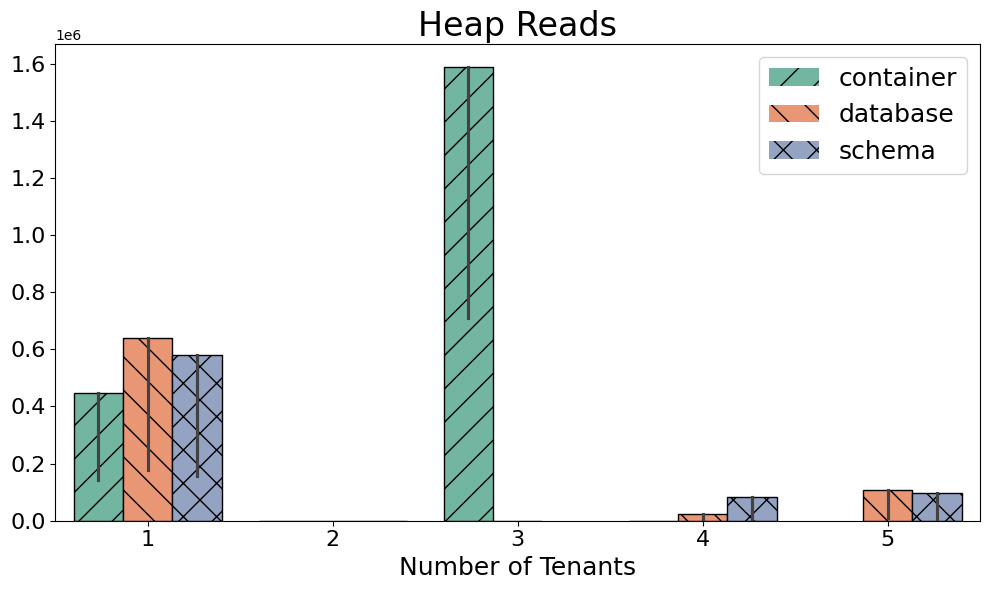

In [16]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Heap Reads', title='Heap Reads')
plot_bars(df_performance, y='Heap Reads', title='Heap Reads', estimator='max')

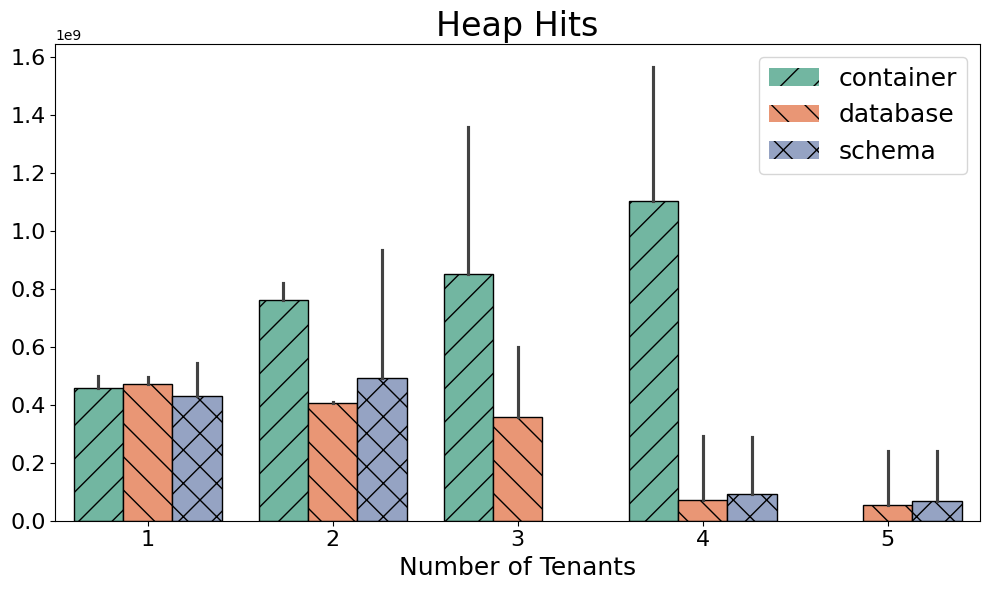

In [17]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Heap Reads', title='Heap Reads')
plot_bars(df_performance, y='Heap Hits', title='Heap Hits', estimator='min')

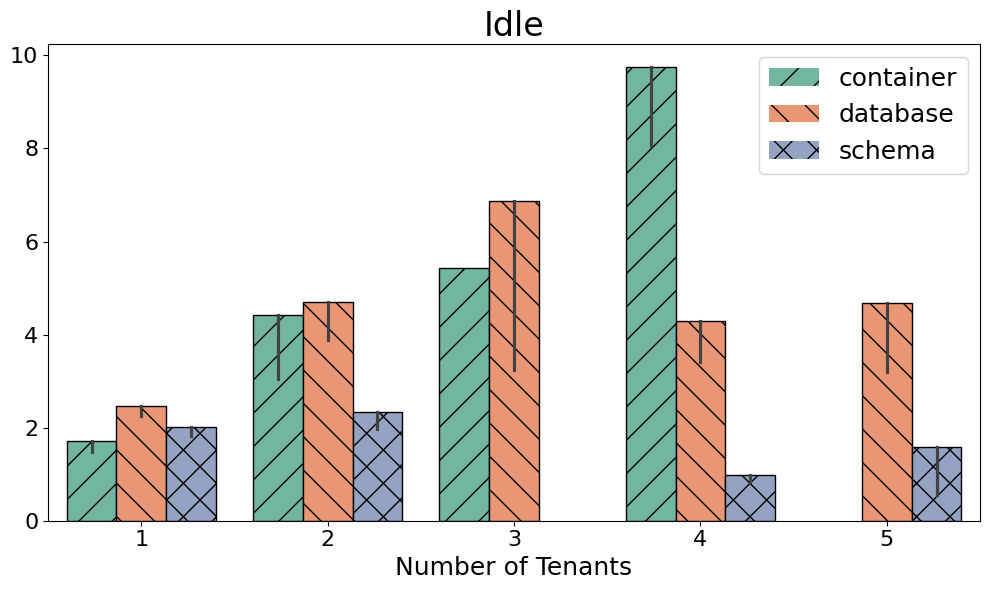

In [18]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Idle', title='Idle')
plot_bars(df_performance, y='Idle', title='Idle', estimator='max')

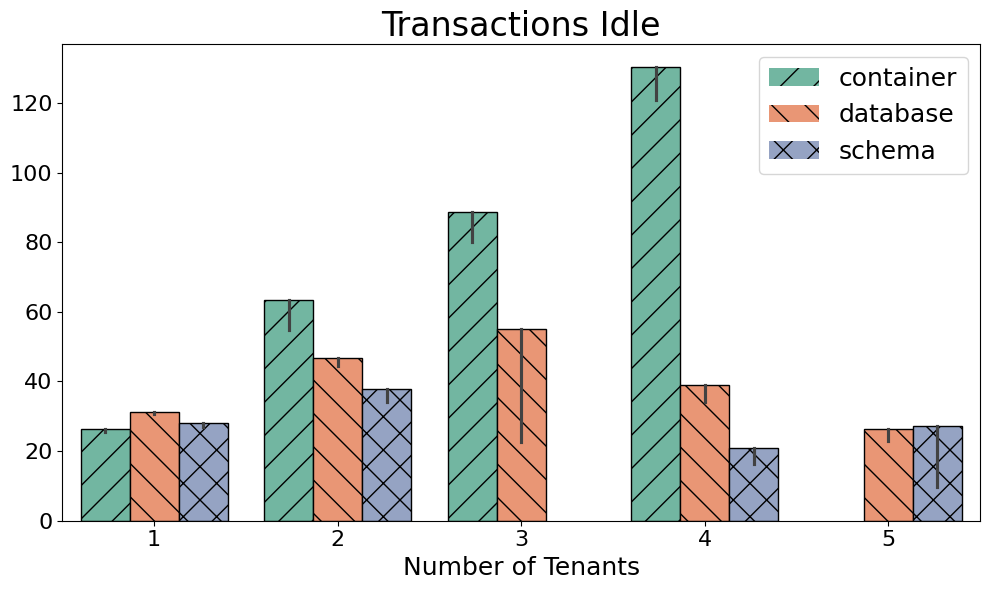

In [19]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Transactions Idle', title='Transactions Idle')
plot_bars(df_performance, y='Transactions Idle', title='Transactions Idle', estimator='max')

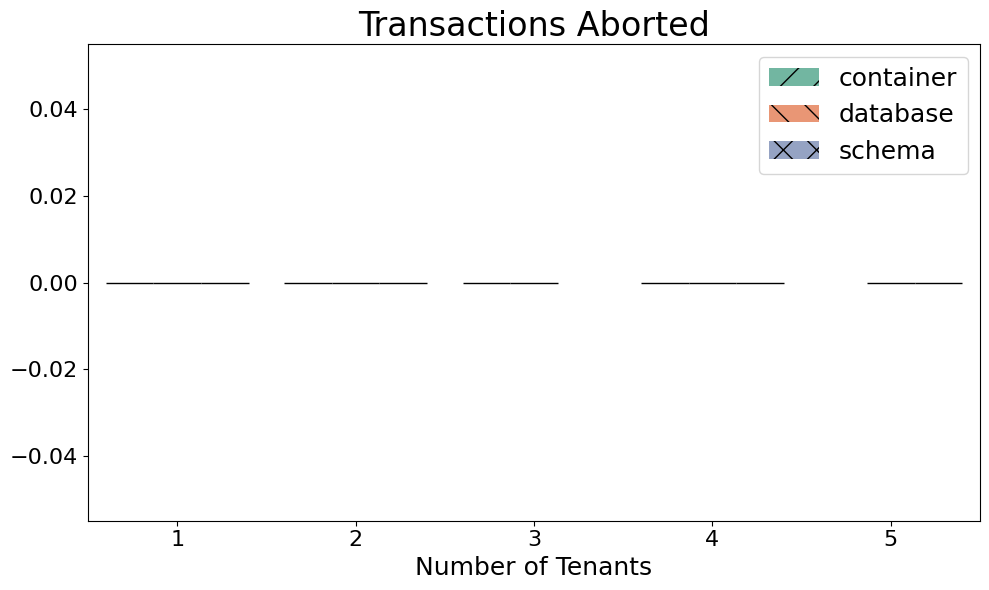

In [20]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Transactions Aborted', title='Transactions Aborted')
plot_bars(df_performance, y='Transactions Aborted', title='Transactions Aborted', estimator='max')

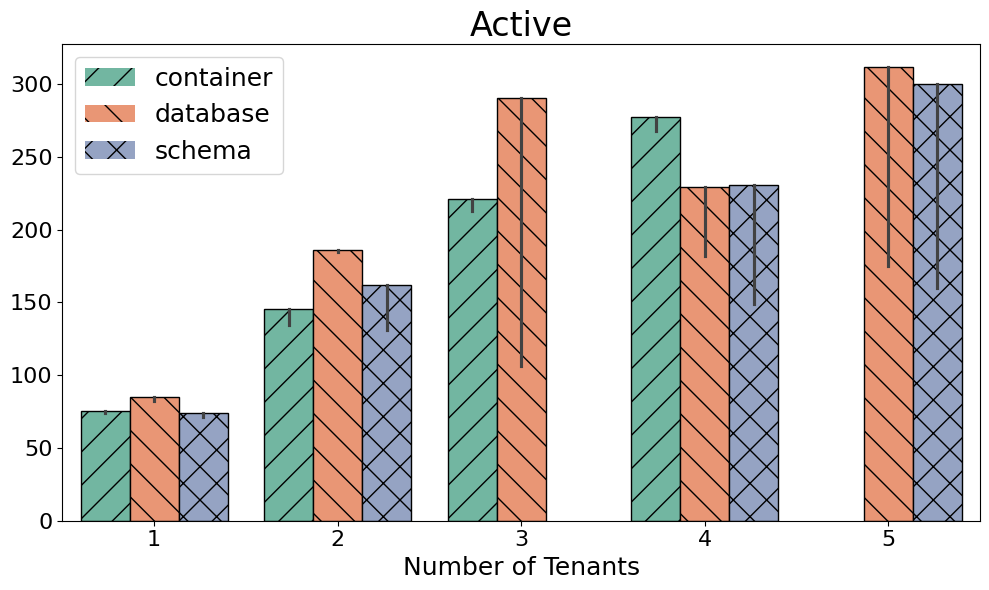

In [21]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Active', title='Active')
plot_bars(df_performance, y='Active', title='Active', estimator='max')

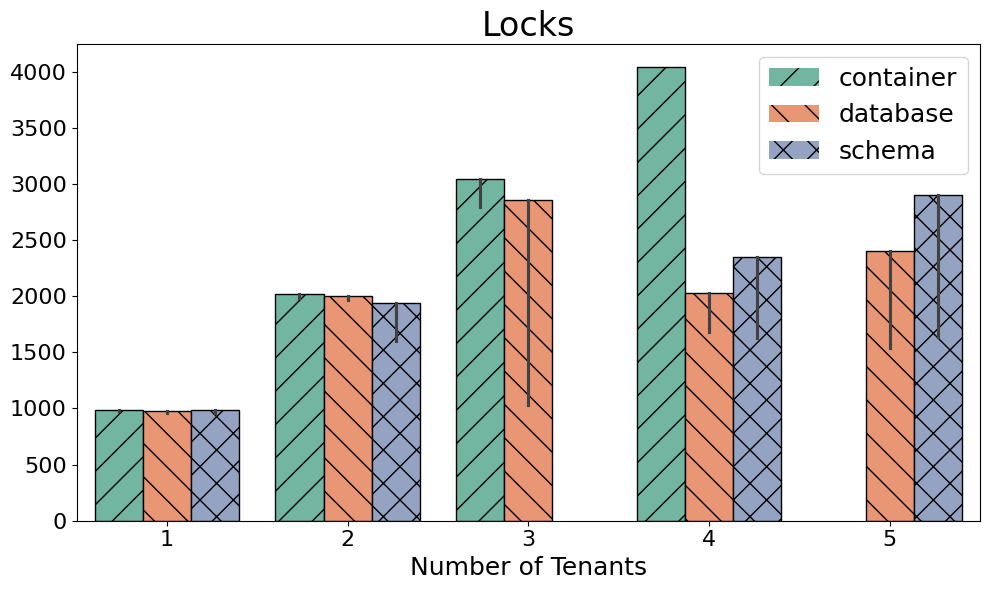

In [22]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Locks', title='Locks')
plot_bars(df_performance, y='Locks', title='Locks', estimator='max')

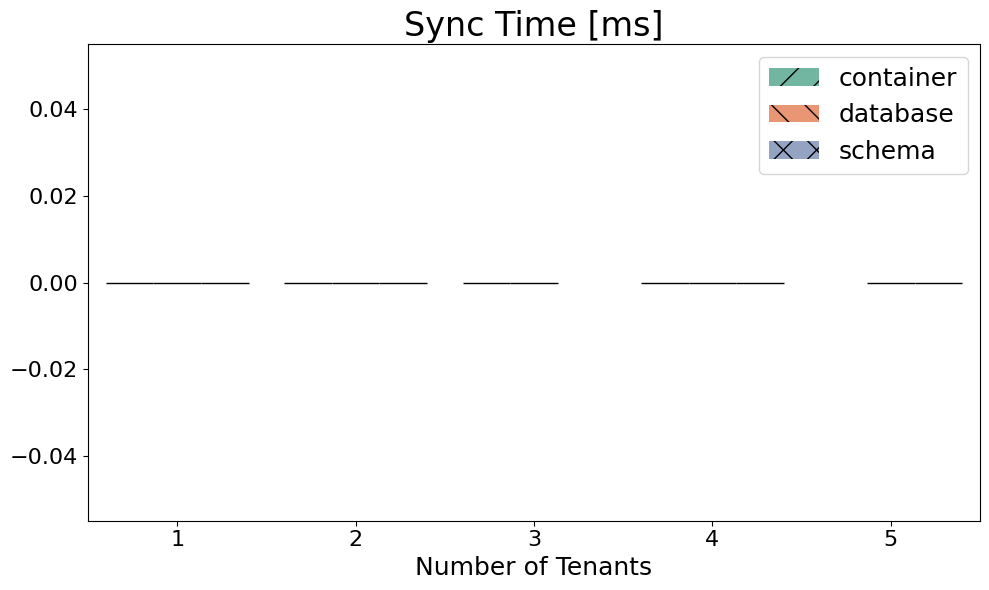

In [23]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Sync Time', title='Sync Time [ms]')
plot_bars(df_performance, y='Sync Time', title='Sync Time [ms]', estimator='max')

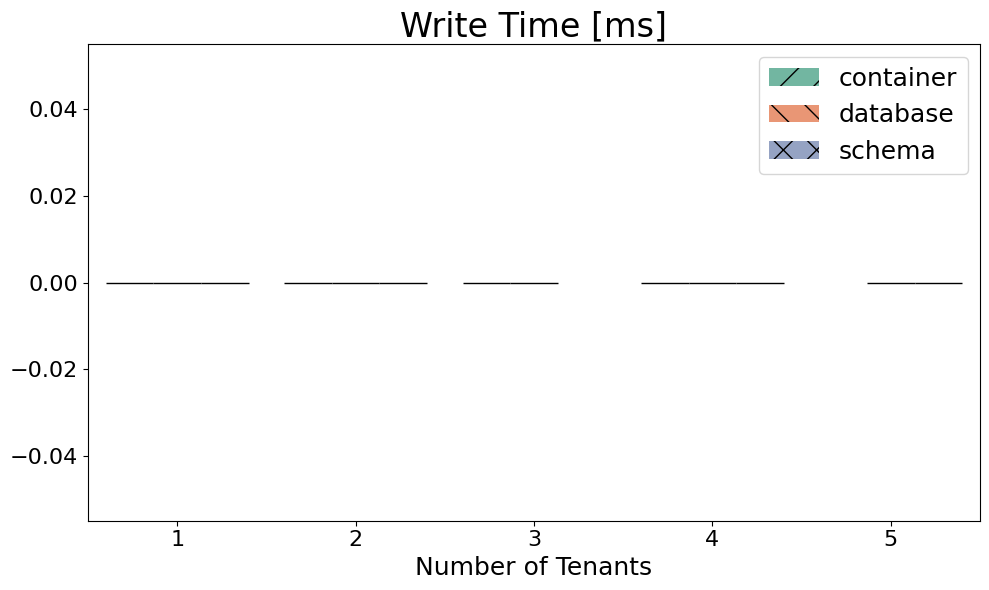

In [24]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Write Time', title='Write Time [ms]')
plot_bars(df_performance, y='Write Time', title='Write Time [ms]', estimator='max')

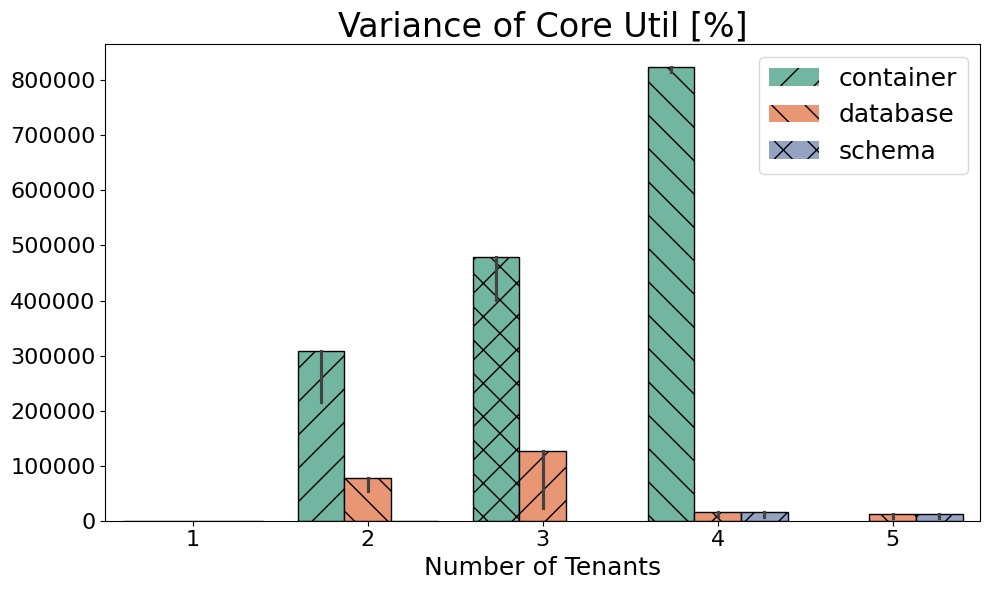

In [25]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
#plot_boxplots(df, y='Write Time', title='Write Time [ms]')
plot_bars(df_performance, y='Variance of Core Util [%]', title='Variance of Core Util [%]', estimator='max')

In [26]:
df_performance = collect.get_performance_all_single()
df_performance

,connection,configuration,experiment_run,client,pod,pod_count,bench,profile,target,time,...,Latency Distribution.Maximum Latency (microseconds),Latency Distribution.Median Latency (microseconds),Latency Distribution.Minimum Latency (microseconds),Latency Distribution.25th Percentile Latency (microseconds),Latency Distribution.90th Percentile Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),Latency Distribution.75th Percentile Latency (microseconds),Latency Distribution.Average Latency (microseconds),type,num_tenants
connection_pod,,,,,,,,,,,,,,,,,,,,,
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,kmhrn.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,12030877,11332,656,7634,27293,188946,17034,19618,container,1
PostgreSQL-1-1-65536-0-2-1,PostgreSQL-1-1-65536-0-2,PostgreSQL-1-1-65536-0,1,2,7w4gq.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3917846,11232,629,7476,26677,241613,16850,20121,container,1
PostgreSQL-1-1-65536-1-1-1,PostgreSQL-1-1-65536-1-1,PostgreSQL-1-1-65536-1,1,1,qfslx.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3529301,14082,618,8952,39198,132435,22569,22372,container,2
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,rs4rt.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,1864584,14384,658,9177,40227,146247,23036,23147,container,2
PostgreSQL-1-1-65536-0-2-1,PostgreSQL-1-1-65536-0-2,PostgreSQL-1-1-65536-0,1,2,qfp2j.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,3263131,14174,604,9213,35215,264246,22064,24513,container,2
PostgreSQL-1-1-65536-1-2-1,PostgreSQL-1-1-65536-1-2,PostgreSQL-1-1-65536-1,1,2,6vxlf.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,2798753,13873,634,9010,35147,195886,21772,23014,container,2
PostgreSQL-1-1-65536-1-1-1,PostgreSQL-1-1-65536-1-1,PostgreSQL-1-1-65536-1,1,1,xpgtm.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,10704774,16873,623,10324,45603,334577,27363,32107,container,3
PostgreSQL-1-1-65536-2-1-1,PostgreSQL-1-1-65536-2-1,PostgreSQL-1-1-65536-2,1,1,69nf6.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,16017638,17062,684,10627,44379,345881,27178,32757,container,3
PostgreSQL-1-1-65536-0-1-1,PostgreSQL-1-1-65536-0-1,PostgreSQL-1-1-65536-0,1,1,qd8kt.dbmsbenchmarker,1,tpcc,postgres,65536,600,...,14121011,16302,661,9975,45735,372335,26629,32048,container,3


## Per Tenant

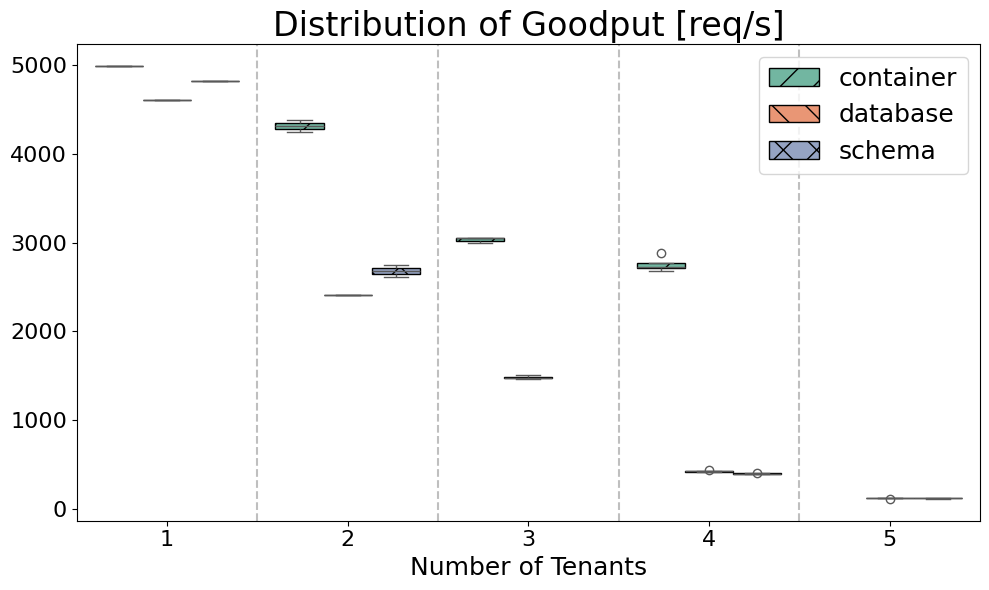

In [27]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_boxplots(df, y='Goodput (requests/second)', title='Distribution of Goodput [req/s]')

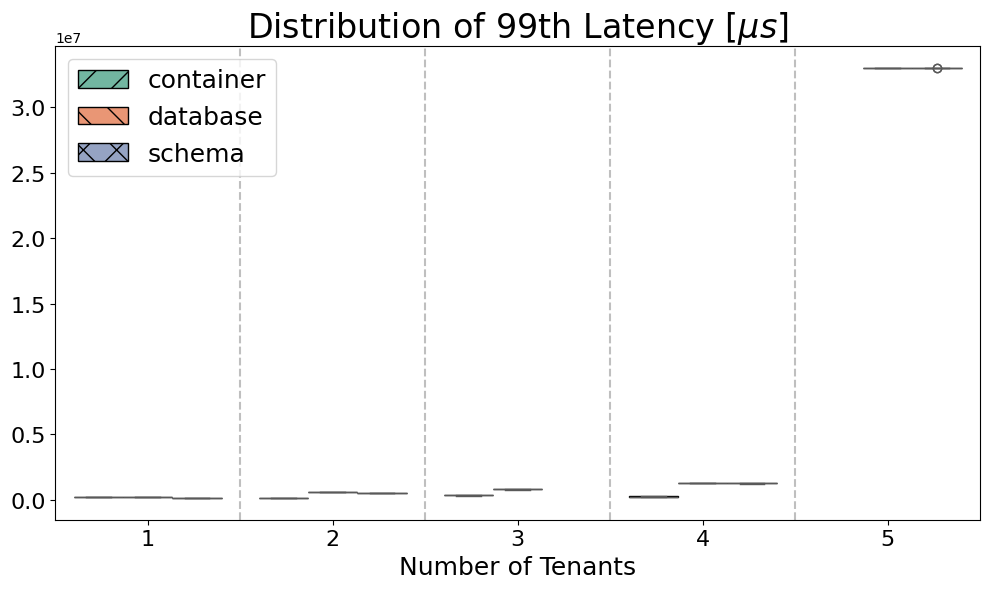

In [28]:
df = df_performance[df_performance['client']=='1']
#df = df_performance.copy()
plot_boxplots(df, y='Latency Distribution.99th Percentile Latency (microseconds)', title='Distribution of 99th Latency [$\mu s$]')


## Per Total

In [29]:
df_performance = collect.get_performance_all()
df_performance

,client,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants
0,1,4992.206444,122,19618.000000,188946,container,1
1,2,4847.276188,95,20121.000000,241613,container,1
0,1,8631.068282,205,22759.500000,146247,container,2
1,2,8247.794605,216,23763.500000,264246,container,2
0,1,9103.734346,227,32304.000000,372335,container,3
1,2,8902.399358,172,33153.000000,313746,container,3
0,1,11019.306261,275,35666.750000,272645,container,4
1,2,11191.760810,296,35090.750000,329256,container,4
0,1,4609.806469,103,21210.000000,219122,database,1
1,2,4934.519531,109,19771.000000,177564,database,1


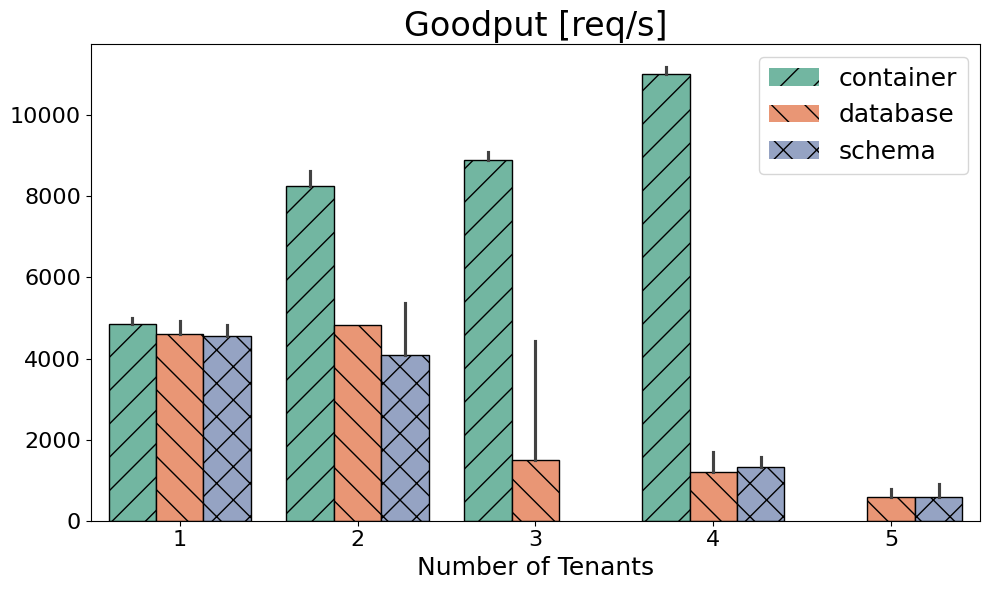

In [30]:
plot_bars(df_performance, y='Goodput (requests/second)', title='Goodput [req/s]', estimator='min')

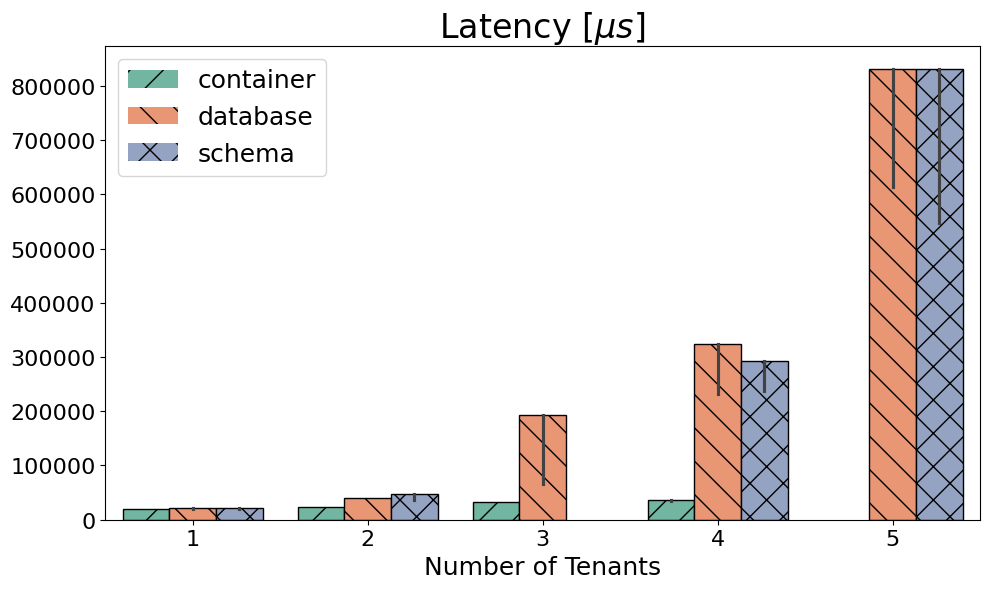

In [31]:
plot_bars(df_performance, y='Latency Distribution.Average Latency (microseconds)', title='Latency [$\mu s$]', estimator='max')

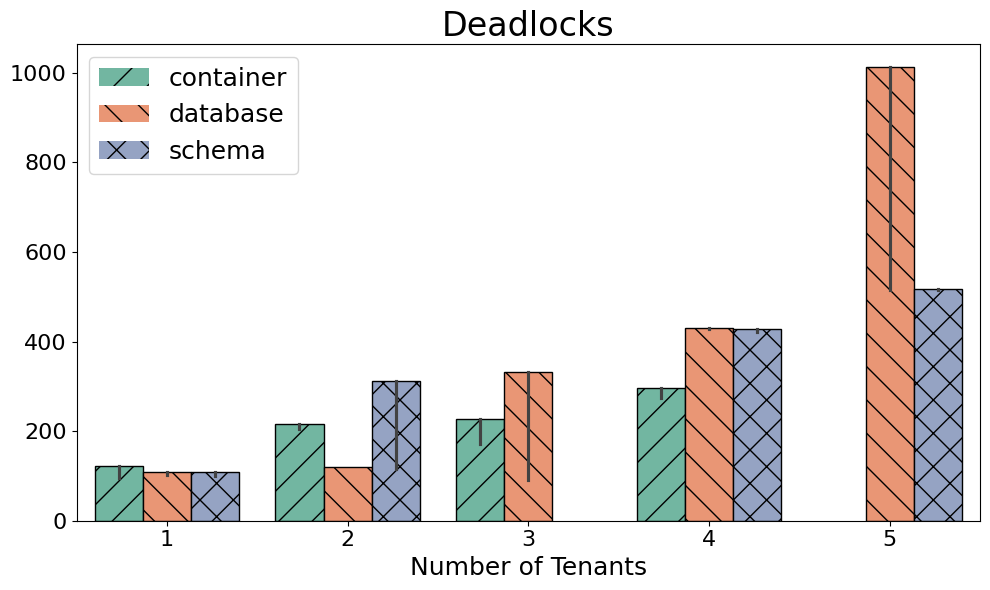

In [32]:
plot_bars(df_performance, y='num_errors', title='Deadlocks', estimator='max')

In [33]:
df_performance = collect.get_loading_time_max_all()
df_performance

,time_load,time_ingest,time_check,terminals,pods,tenant,client,datadisk,type,num_tenants
PostgreSQL-1-1-65536-0-1,274.0,112.0,160.0,1,1,0,1,7984,container,1
PostgreSQL-1-1-65536-0-2,274.0,112.0,160.0,1,1,0,2,15583,container,1
PostgreSQL-1-1-65536-0-1,311.0,138.0,173.0,1,1,0,1,3056,container,2
PostgreSQL-1-1-65536-0-2,311.0,138.0,173.0,1,1,0,2,7154,container,2
PostgreSQL-1-1-65536-1-1,317.0,144.0,173.0,1,1,1,1,3056,container,2
PostgreSQL-1-1-65536-1-2,317.0,144.0,173.0,1,1,1,2,9936,container,2
PostgreSQL-1-1-65536-0-1,339.0,137.0,200.0,1,1,0,1,5481,container,3
PostgreSQL-1-1-65536-0-2,339.0,137.0,200.0,1,1,0,2,7490,container,3
PostgreSQL-1-1-65536-1-1,328.0,130.0,197.0,1,1,1,1,5974,container,3
PostgreSQL-1-1-65536-1-2,328.0,130.0,197.0,1,1,1,2,7767,container,3


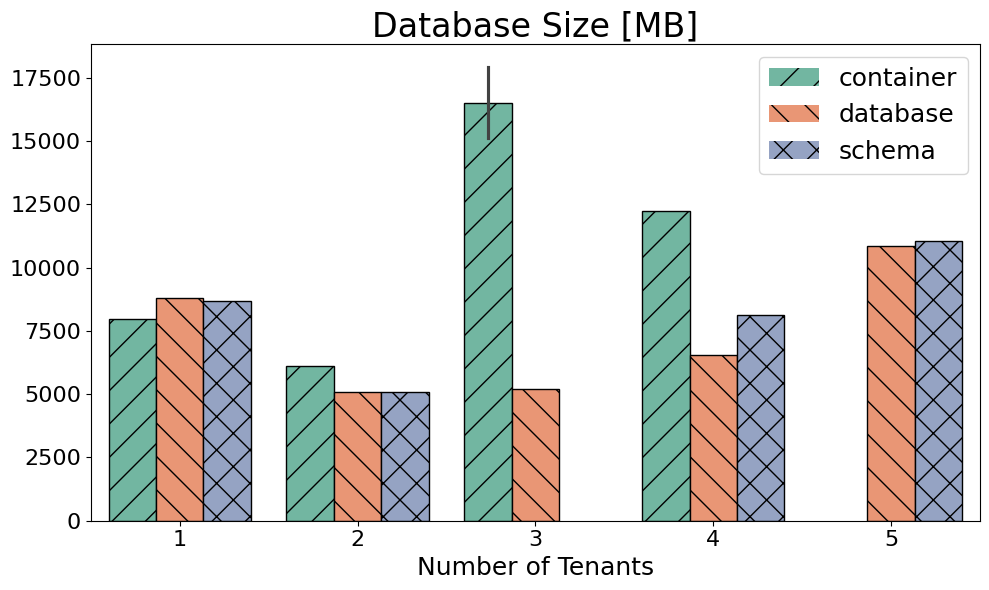

In [34]:
df_performance_first = df_performance[df_performance['client'] == '1']
plot_bars(df_performance_first, y='datadisk', title='Database Size [MB]', estimator='sum')

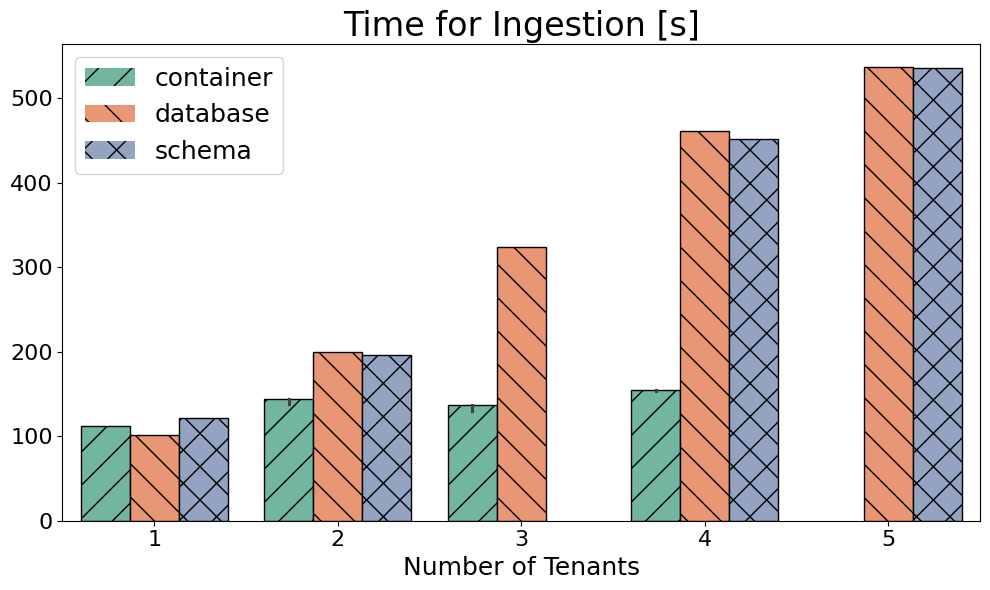

In [35]:
plot_bars(df_performance, y='time_ingest', title='Time for Ingestion [s]', estimator='max')

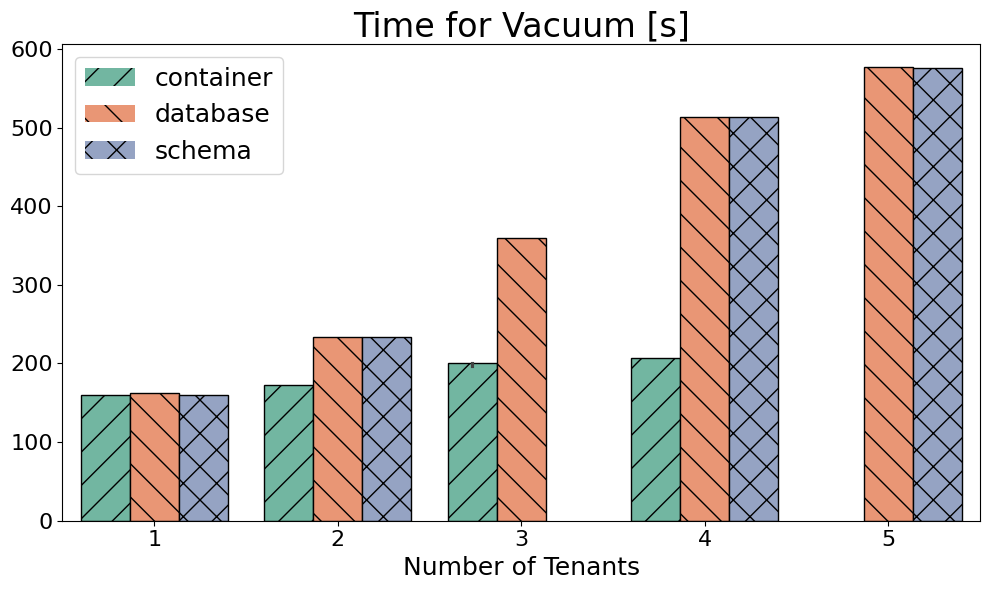

In [36]:
plot_bars(df_performance, y='time_check', title='Time for Vacuum [s]', estimator='max')

## Hardware Benchmarking

In [37]:
df_performance = collect.get_monitoring_all(type="stream")
df_performance = df_performance[df_performance['client'] == '1']
df_performance

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,CPU Throttled,Locks,Access Exclusive,Access Share,Exclusive,...,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],Variance of Core Util [%],type,num_tenants
0,1,11725.82,14.24,16.00,23.60,0.0,987.28,0.00,0.00,0.00,...,446581.0,5.001392e+08,0.0,0.0,116.0,100.0,99.980000,0.00,container,1
0,1,20942.69,19.72,32.00,39.33,0.0,2021.69,9.20,657.32,30.79,...,74.0,8.199781e+08,0.0,0.0,297.0,227.0,100.000000,308429.98,container,2
0,1,23310.68,35.44,48.00,45.26,0.0,3046.60,20.62,1038.38,45.69,...,1588525.0,8.519603e+08,0.0,0.0,338.0,288.0,99.786667,400135.03,container,3
0,1,29564.34,36.74,63.91,57.98,0.0,4040.49,16.34,1336.12,50.60,...,97.0,1.101593e+09,0.0,0.0,558.0,415.0,100.000000,824232.43,container,4
0,1,9781.57,14.00,16.00,21.45,0.0,980.11,0.00,0.00,0.00,...,640700.0,4.968390e+08,0.0,0.0,112.0,104.0,99.980000,0.00,database,1
0,1,12426.70,12.87,16.00,27.34,0.0,1962.59,5.45,639.29,35.81,...,42.0,4.101661e+08,0.0,0.0,259.0,200.0,100.000000,54867.43,database,2
0,1,12084.39,15.33,16.00,25.22,0.0,2854.11,7.92,917.88,44.84,...,64.0,3.591706e+08,0.0,0.0,357.0,278.0,100.000000,127199.97,database,3
0,1,7034.48,15.96,16.00,27.19,0.0,1684.38,4.11,539.86,30.36,...,1646.0,2.924972e+08,0.0,0.0,347.0,280.0,56.570000,16606.10,database,4
0,1,4288.48,15.69,16.00,14.97,0.0,1539.34,3.72,491.87,31.42,...,9492.0,2.420041e+08,0.0,0.0,314.0,272.0,49.440000,5610.83,database,5
0,1,10771.14,14.24,16.00,21.06,0.0,988.75,0.00,0.00,0.00,...,578565.0,5.445841e+08,0.0,0.0,117.0,104.0,99.980000,0.00,schema,1


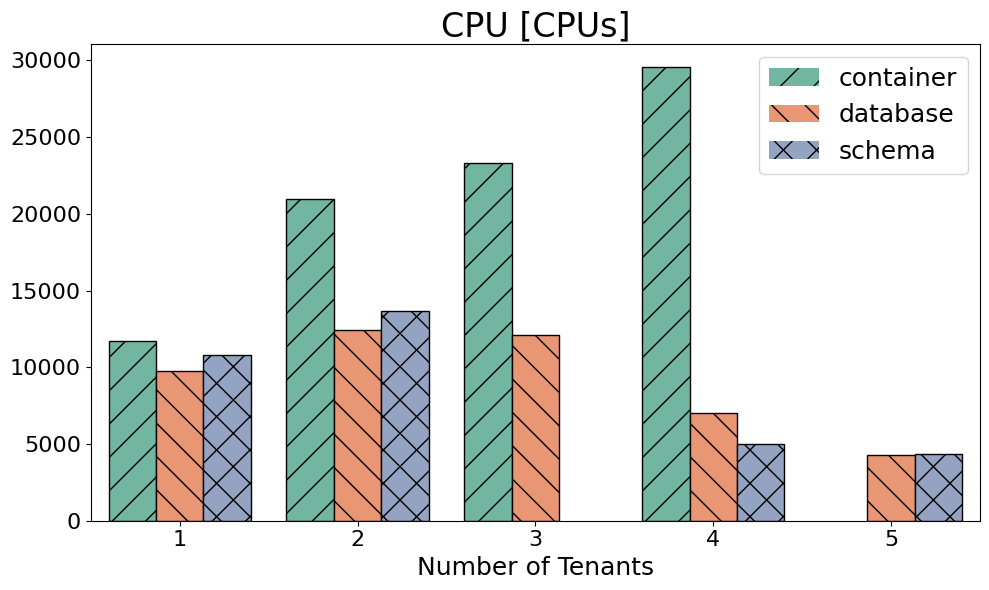

In [38]:
plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

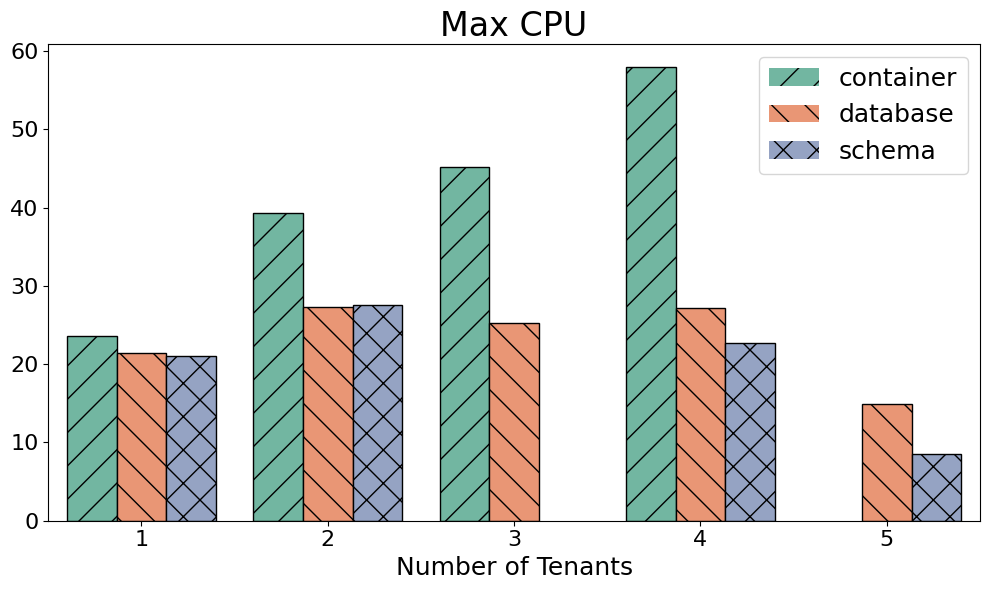

In [39]:
plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

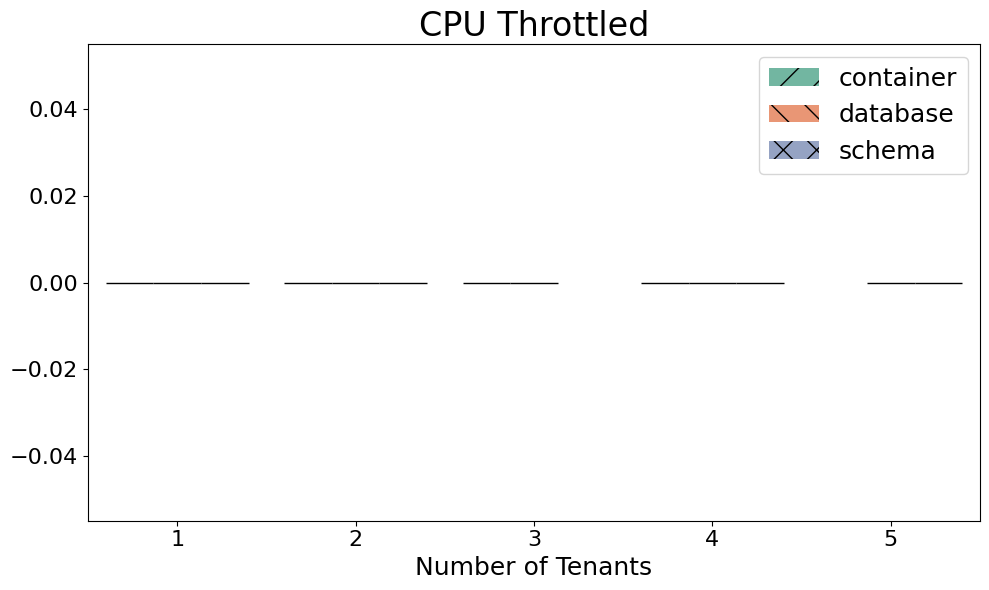

In [40]:
plot_bars(df_performance, y='CPU Throttled', title='CPU Throttled', estimator='sum')

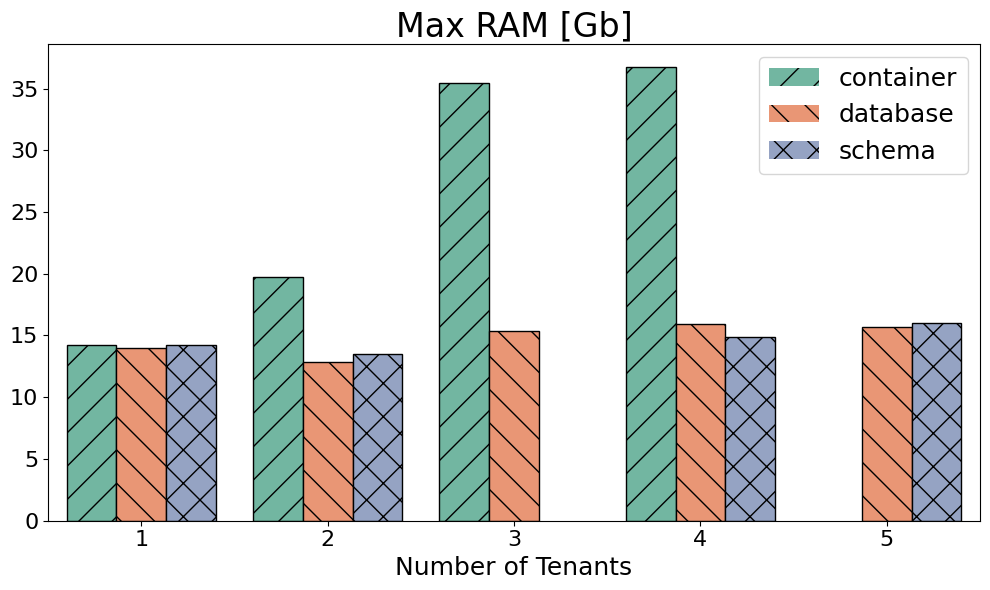

In [41]:
plot_bars(df_performance, y='Max RAM [Gb]', title='Max RAM [Gb]', estimator='sum')

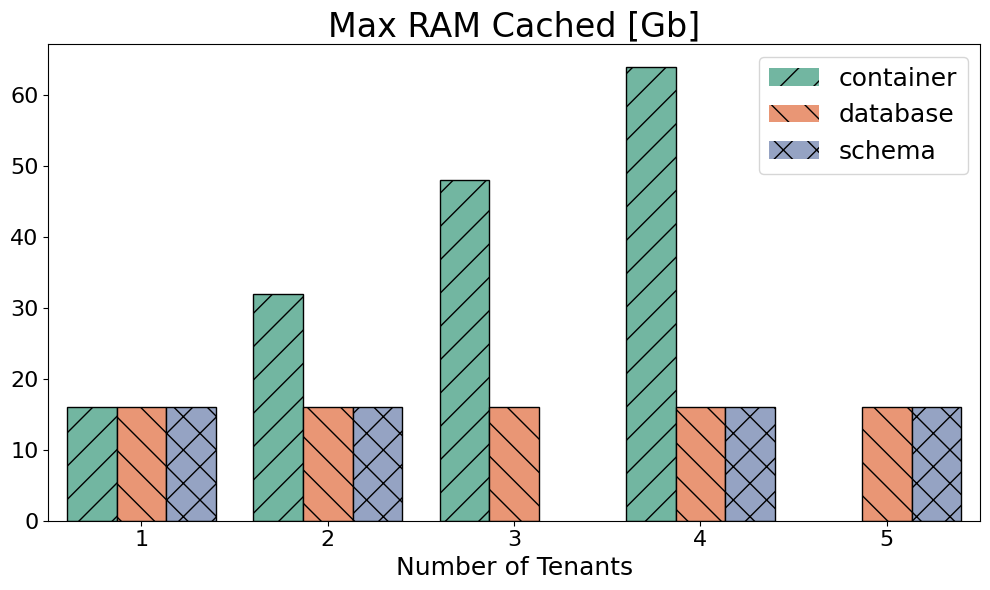

In [42]:
plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

## Hardware Loading

In [43]:
df_performance = collect.get_monitoring_all("stream")
#df_performance = df_performance[df_performance['client'] == '1']
df_performance

,client,CPU [CPUs],Max RAM [Gb],Max RAM Cached [Gb],Max CPU,CPU Throttled,Locks,Access Exclusive,Access Share,Exclusive,...,Heap Reads,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],Variance of Core Util [%],type,num_tenants
0,1,11725.82,14.24,16.00,23.60,0.0,987.28,0.00,0.00,0.00,...,446581.0,5.001392e+08,0.0,0.0,116.0,100.0,99.980000,0.00,container,1
1,2,10658.91,15.56,16.00,21.08,0.0,978.75,0.00,0.00,0.00,...,144068.0,4.569321e+08,0.0,0.0,109.0,96.0,99.980000,0.00,container,1
0,1,20942.69,19.72,32.00,39.33,0.0,2021.69,9.20,657.32,30.79,...,74.0,8.199781e+08,0.0,0.0,297.0,227.0,100.000000,308429.98,container,2
1,2,19224.39,24.32,32.00,36.62,0.0,1983.66,8.24,645.64,35.11,...,58.0,7.612098e+08,0.0,0.0,244.0,193.0,100.000000,214834.43,container,2
0,1,23310.68,35.44,48.00,45.26,0.0,3046.60,20.62,1038.38,45.69,...,1588525.0,8.519603e+08,0.0,0.0,338.0,288.0,99.786667,400135.03,container,3
1,2,24623.32,41.05,48.00,53.58,0.0,2791.79,15.00,938.06,44.39,...,709404.0,1.357277e+09,0.0,0.0,325.0,304.0,99.876667,478573.60,container,3
0,1,29564.34,36.74,63.91,57.98,0.0,4040.49,16.34,1336.12,50.60,...,97.0,1.101593e+09,0.0,0.0,558.0,415.0,100.000000,824232.43,container,4
1,2,27635.42,42.39,64.00,56.57,0.0,4041.11,15.25,1330.30,51.63,...,104.0,1.565014e+09,0.0,0.0,789.0,607.0,99.755000,815041.15,container,4
0,1,9781.57,14.00,16.00,21.45,0.0,980.11,0.00,0.00,0.00,...,640700.0,4.968390e+08,0.0,0.0,112.0,104.0,99.980000,0.00,database,1
1,2,10176.94,15.61,16.00,20.81,0.0,955.86,0.00,0.00,0.00,...,177536.0,4.718775e+08,0.0,0.0,111.0,105.0,99.980000,0.00,database,1


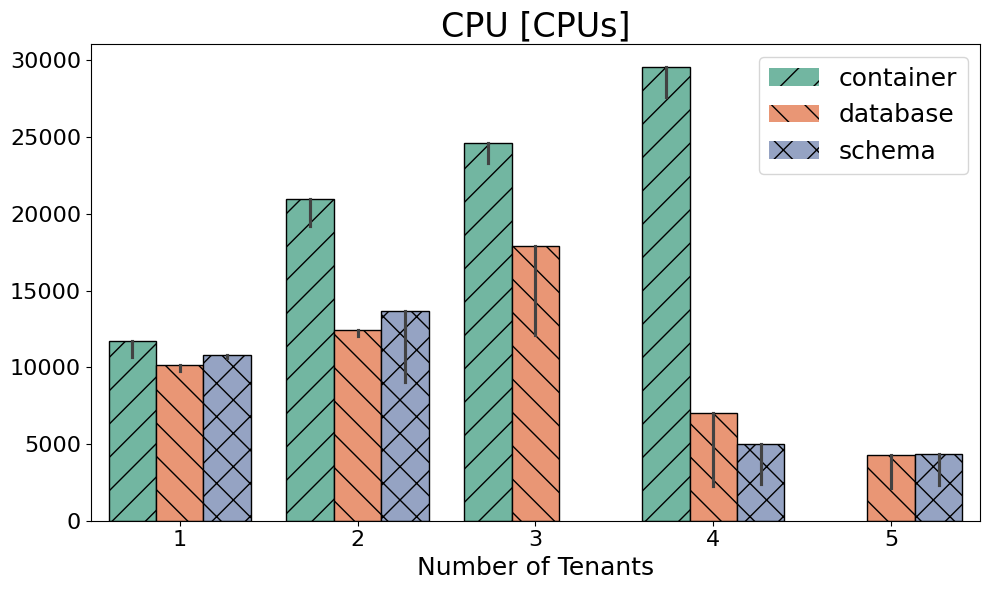

In [44]:
plot_bars(df_performance, y='CPU [CPUs]', title='CPU [CPUs]', estimator='max')

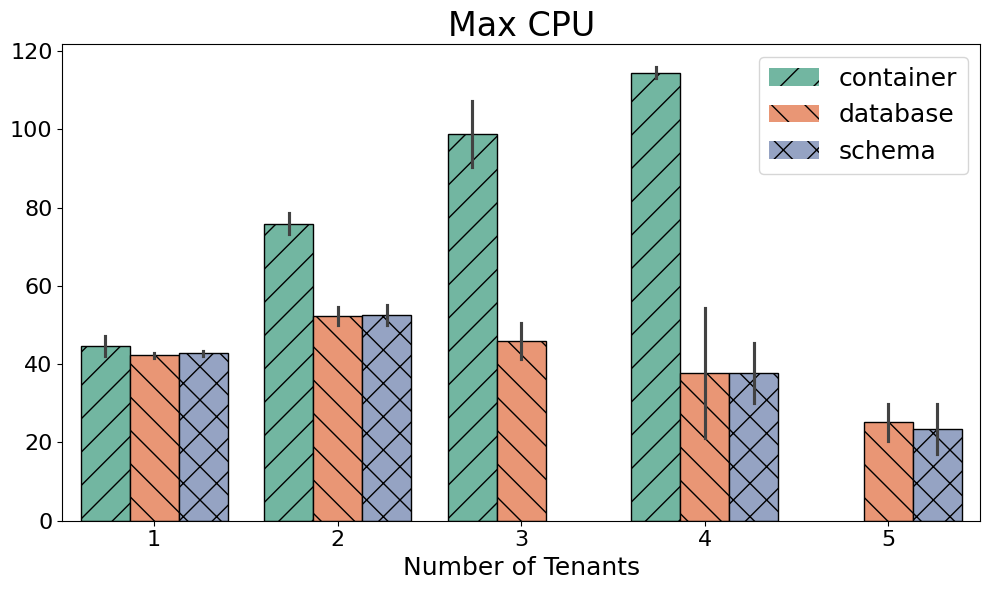

In [45]:
plot_bars(df_performance, y='Max CPU', title='Max CPU', estimator='sum')

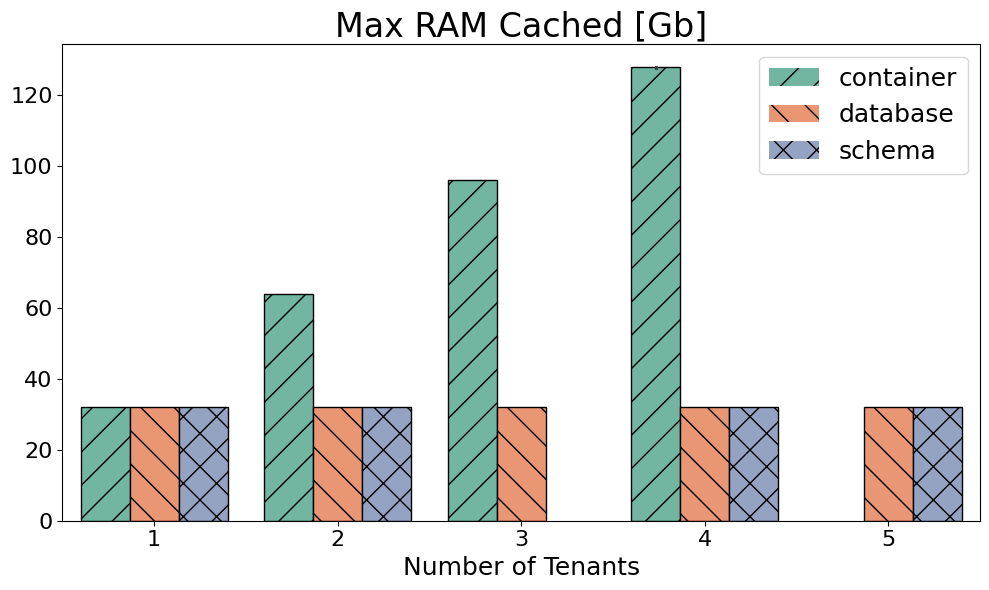

In [46]:
plot_bars(df_performance, y='Max RAM Cached [Gb]', title='Max RAM Cached [Gb]', estimator='sum')

# Efficiency

In [47]:
client = '1'

df_performance_monitoring = collect.get_monitoring_all(type="stream")
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = collect.get_performance_all()
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['I_Lat'] = 1./merged_df['E_Lat']
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']
merged_df

,client_x,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants,client_y,CPU [CPUs],Max RAM [Gb],...,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],Variance of Core Util [%],E_Tpx,E_Lat,E_RAM
0,1,4992.206444,122,19618.000000,188946,container,1,1,11725.82,14.24,...,5.001392e+08,0.0,0.0,116.0,100.0,99.980000,0.00,255.446857,0.065933,350.576295
1,1,8631.068282,205,22759.500000,146247,container,2,1,20942.69,19.72,...,8.199781e+08,0.0,0.0,297.0,227.0,100.000000,308429.98,247.276781,0.045804,437.680947
2,1,9103.734346,227,32304.000000,372335,container,3,1,23310.68,35.44,...,8.519603e+08,0.0,0.0,338.0,288.0,99.786667,400135.03,234.323521,0.036441,256.877380
3,1,11019.306261,275,35666.750000,272645,container,4,1,29564.34,36.74,...,1.101593e+09,0.0,0.0,558.0,415.0,100.000000,824232.43,223.633734,0.030795,299.926681
4,1,4609.806469,103,21210.000000,219122,database,1,1,9781.57,14.00,...,4.968390e+08,0.0,0.0,112.0,104.0,99.980000,0.00,282.764820,0.069427,329.271891
5,1,4823.216465,119,40740.000000,584992,database,2,1,12426.70,12.87,...,4.101661e+08,0.0,0.0,259.0,200.0,100.000000,54867.43,232.879999,0.044444,374.764294
6,1,4437.846405,90,66429.666667,807845,database,3,1,12084.39,15.33,...,3.591706e+08,0.0,0.0,357.0,278.0,100.000000,127199.97,220.342760,0.035294,289.487698
7,1,1684.299909,431,232320.750000,1263203,database,4,1,7034.48,15.96,...,2.924972e+08,0.0,0.0,347.0,280.0,56.570000,16606.10,143.660931,0.024737,105.532576
8,1,580.111640,515,830517.200000,33023976,database,5,1,4288.48,15.69,...,2.420041e+08,0.0,0.0,314.0,272.0,49.440000,5610.83,81.163252,0.016756,36.973336
9,1,4826.276374,109,20279.000000,167035,schema,1,1,10771.14,14.24,...,5.445841e+08,0.0,0.0,117.0,104.0,99.980000,0.00,268.844878,0.067662,338.923903


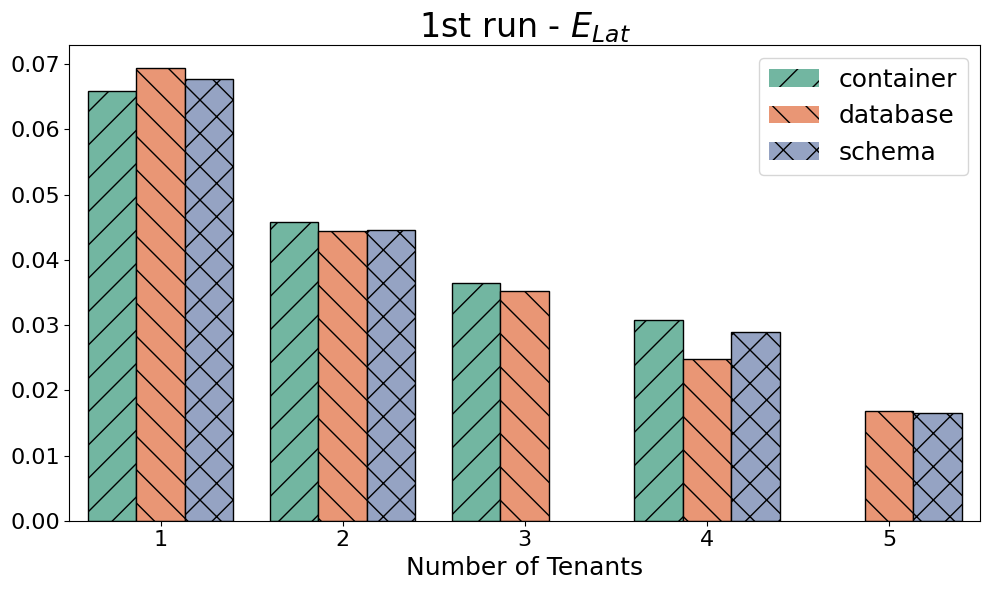

In [48]:
plot_bars(merged_df, y='E_Lat', title='1st run - $E_{Lat}$', estimator='max')

In [49]:
#plot_bars(merged_df, y='I_Lat', title='1st run - $I_{Lat}$', estimator='max')

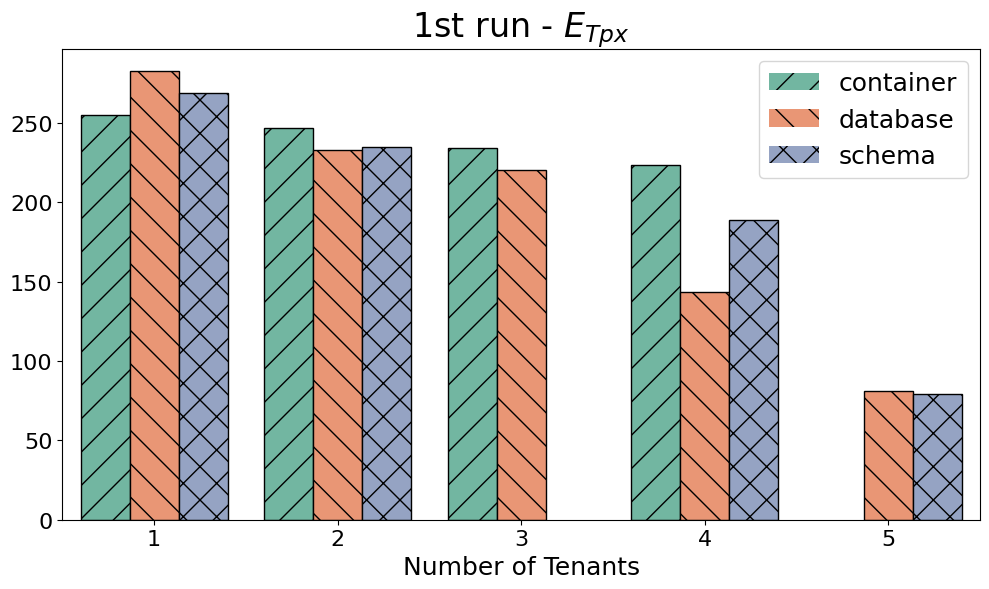

In [50]:
plot_bars(merged_df, y='E_Tpx', title='1st run - $E_{Tpx}$', estimator='max')

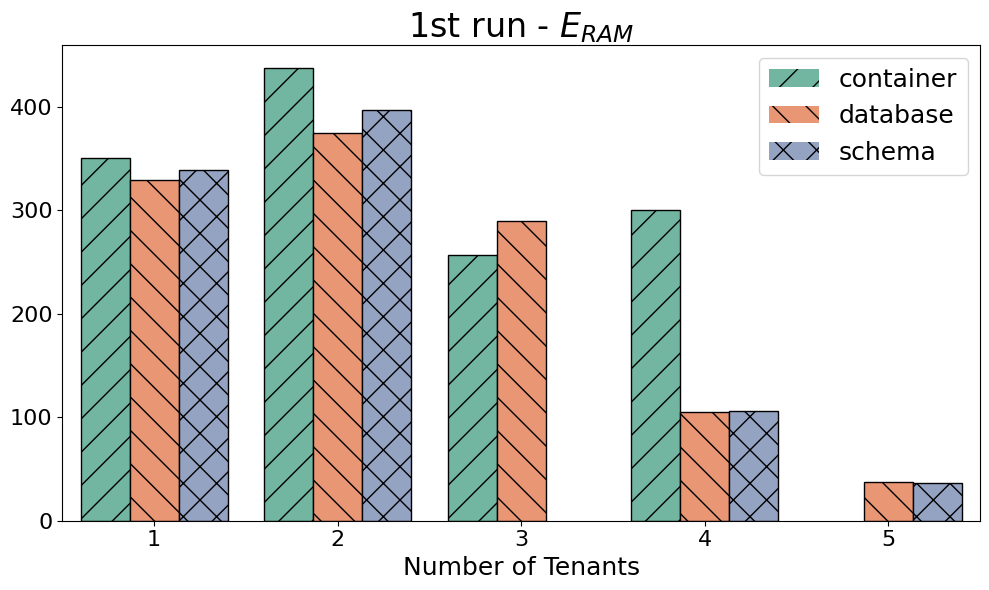

In [51]:
plot_bars(merged_df, y='E_RAM', title='1st run - $E_{RAM}$', estimator='min')

In [52]:
client = '2'

df_performance_monitoring = collect.get_monitoring_all(type="stream")
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = collect.get_performance_all()
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants'], how='inner')
#merged_df['CPUs/Request'] = merged_df['CPU [CPUs]'] / merged_df['Goodput (requests/second)'] / 600.
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU [CPUs]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU [CPUs]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Max RAM [Gb]']

merged_df

,client_x,Goodput (requests/second),num_errors,Latency Distribution.Average Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),type,num_tenants,client_y,CPU [CPUs],Max RAM [Gb],...,Heap Hits,Sync Time,Write Time,Number Autoanalyze,Number Autovacuum,Cache Hit Ratio [%],Variance of Core Util [%],E_Tpx,E_Lat,E_RAM
0,2,4847.276188,95,20121.000000,241613,container,1,2,10658.91,15.56,...,4.569321e+08,0.0,0.0,109.0,96.0,99.980000,0.00,272.857704,0.068284,311.521606
1,2,8247.794605,216,23763.500000,264246,container,2,2,19224.39,24.32,...,7.612098e+08,0.0,0.0,244.0,193.0,100.000000,214834.43,257.416582,0.046786,339.136291
2,2,8902.399358,172,33153.000000,313746,container,3,2,24623.32,41.05,...,1.357277e+09,0.0,0.0,325.0,304.0,99.876667,478573.60,216.926053,0.035000,216.867219
3,2,11191.760810,296,35090.750000,329256,container,4,2,27635.42,42.39,...,1.565014e+09,0.0,0.0,789.0,607.0,99.755000,815041.15,242.987314,0.032112,264.018891
4,2,4934.519531,109,19771.000000,177564,database,1,2,10176.94,15.61,...,4.718775e+08,0.0,0.0,111.0,105.0,99.980000,0.00,290.923570,0.070498,316.112718
5,2,4824.253118,121,40702.500000,629142,database,2,2,12016.60,15.79,...,4.057572e+08,0.0,0.0,222.0,175.0,100.000000,76971.40,240.879439,0.045217,305.525847
6,2,1507.558305,331,192617.333333,1049546,database,3,2,17927.50,15.72,...,5.982058e+08,0.0,0.0,571.0,459.0,36.260000,22848.94,50.455166,0.017017,95.900656
7,2,1204.734927,427,323640.250000,1675426,database,4,2,2294.60,15.75,...,7.260810e+07,0.0,0.0,114.0,99.0,73.130000,9196.98,315.018285,0.036696,76.491107
8,2,793.574954,1013,613001.600000,5511283,database,5,2,2110.20,15.29,...,5.479406e+07,0.0,0.0,156.0,139.0,68.940000,12374.33,225.639737,0.027804,51.901567
9,2,4547.326271,100,21444.000000,218878,schema,1,2,10618.09,15.76,...,4.287868e+08,0.0,0.0,107.0,101.0,99.980000,0.00,256.957302,0.066271,288.535931


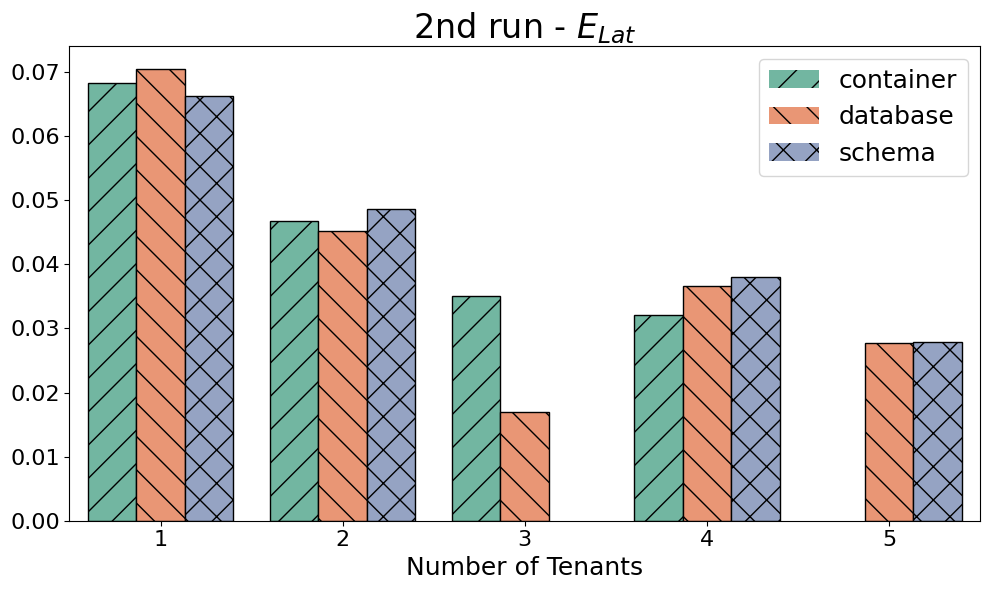

In [53]:
plot_bars(merged_df, y='E_Lat', title='2nd run - $E_{Lat}$', estimator='max')

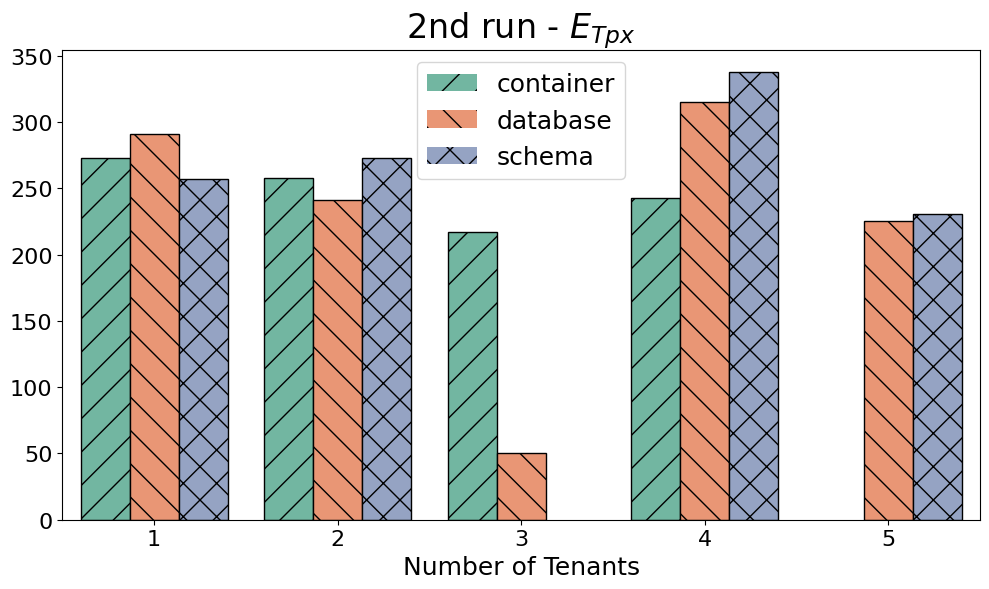

In [54]:
plot_bars(merged_df, y='E_Tpx', title='2nd run - $E_{Tpx}$', estimator='max')

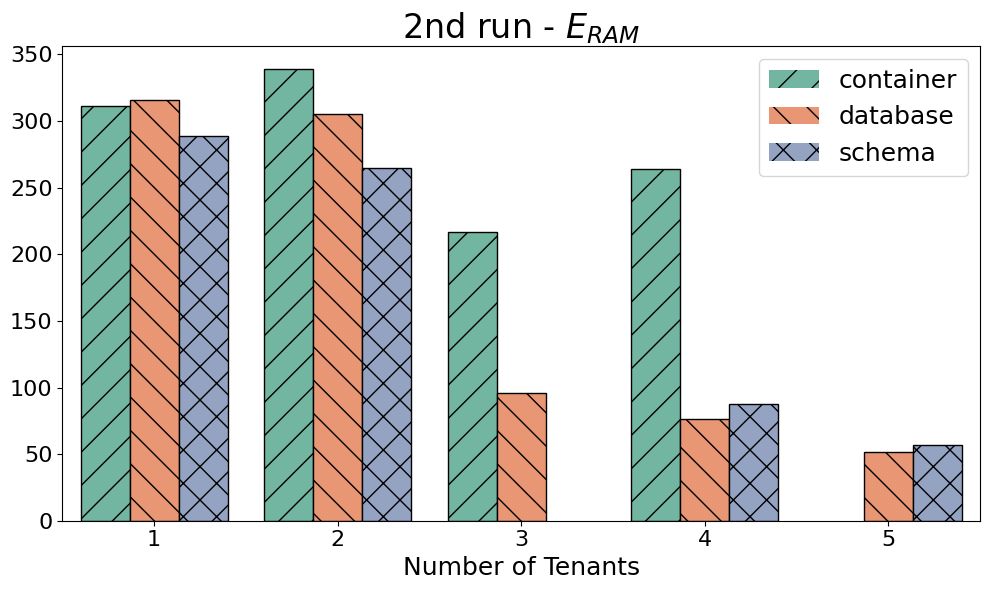

In [55]:
plot_bars(merged_df, y='E_RAM', title='2nd run - $E_{RAM}$', estimator='max')

In [56]:
import os
import zipfile

def zip_all_results():
    # Set the base directory containing the folders
    base_dir = path # "/path/to/your/folders"  # CHANGE THIS to your actual directory
    # List all folder names in the directory
    folder_names = codes
    # Create a zip for each folder
    for folder in folder_names:
        folder_path = os.path.join(base_dir, folder)
        zip_path = os.path.join(base_dir, f"{folder}.zip")
        print(f"Zipping {folder_path} to {zip_path}...")
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, _, files in os.walk(folder_path):
                for file in files:
                    abs_path = os.path.join(root, file)
                    rel_path = os.path.relpath(abs_path, folder_path)
                    zipf.write(abs_path, arcname=os.path.join(folder, rel_path))
    print("✅ Done zipping all folders.")


In [57]:
#zip_all_results()